In [4]:
#pip install pandas numpy matplotlib seaborn scikit-learn xgboost shap


Install libraries 

In [5]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install shap

You should consider upgrading via the 'c:\users\pranathi\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\pranathi\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\pranathi\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\pranathi\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\pranathi\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\pranathi\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\pranathi\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


STEP 2: Load and Explore the Dataset

Load the Data

In [6]:
import pandas as pd

# Load dataset (adjust path if needed)
data = pd.read_csv("student-mat.csv")

# View the first few rows
print(data.head())


  school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
2  GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
3  GP;"F";15;"U";"GT3";"T";4;2;"health";"services...                            

Understand the Data

In [7]:
# Basic info
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                               --------------  ----- 
 0   school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
       school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardia

In [8]:
data = pd.read_csv("student-mat.csv", sep=';')


Visualize the Data 

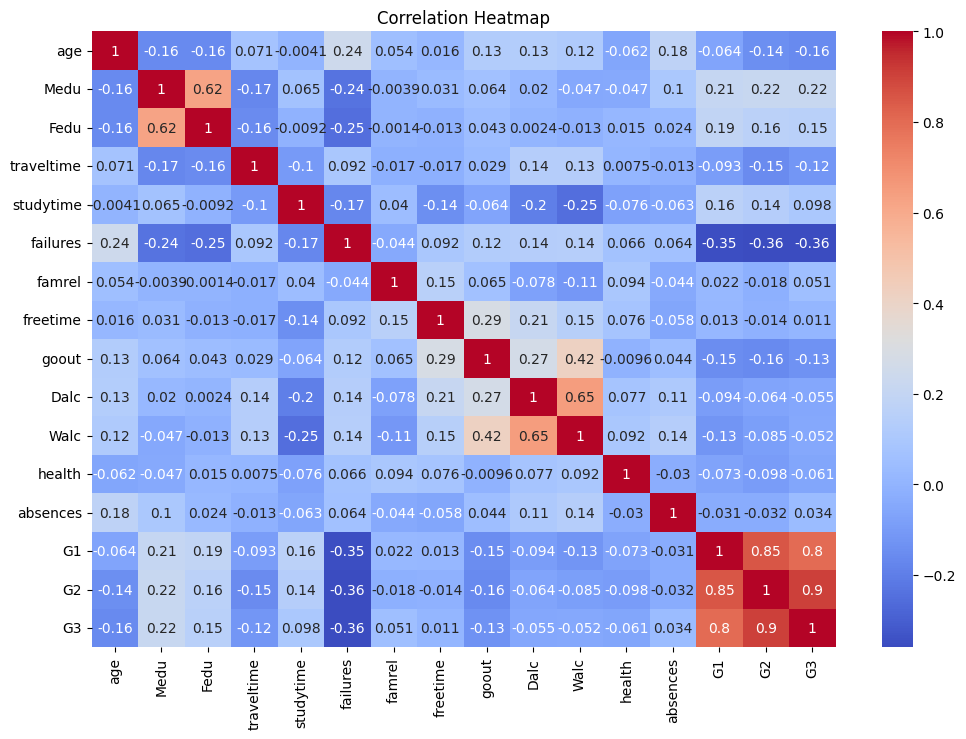

In [9]:
# Only select numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


STEP 3: Preprocessing and Feature Engineering

Create Target Variable

In [10]:
data['pass'] = data['G3'] >= 10
data['pass'] = data['pass'].astype(int)

Convert Categorical Columns

In [11]:
# One-hot encode categorical features
data_encoded = pd.get_dummies(data.drop(columns=['G3']), drop_first=True)

Define Features and Target

In [12]:
X = data_encoded
y = data['pass']

Split the Data

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a Simple Model

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


STEP 4: Prepare Data for Modeling

Create Target Variable

In [15]:
# Pass if G3 >= 10 else fail
data['pass'] = (data['G3'] >= 10).astype(int)

Encode Categorical Variables

In [16]:
# Drop G3 since it's the original grade, and we use pass as target
data_model = data.drop(columns=['G3'])

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data_model, drop_first=True)

Define Features and Target

In [17]:
X = data_encoded.drop(columns=['pass'])
y = data_encoded['pass']

Split Data into Train and Test Sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

STEP 5: Train Your First Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9240506329113924

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.98      0.90      0.94        52

    accuracy                           0.92        79
   macro avg       0.91      0.93      0.92        79
weighted avg       0.93      0.92      0.93        79



STEP 6 : Feature Importance Plot

C:\Users\pranathi\AppData\Local\Temp\ipykernel_11184\1764610759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.nlargest(10), y=feat_importances.nlargest(10).index, palette="viridis")


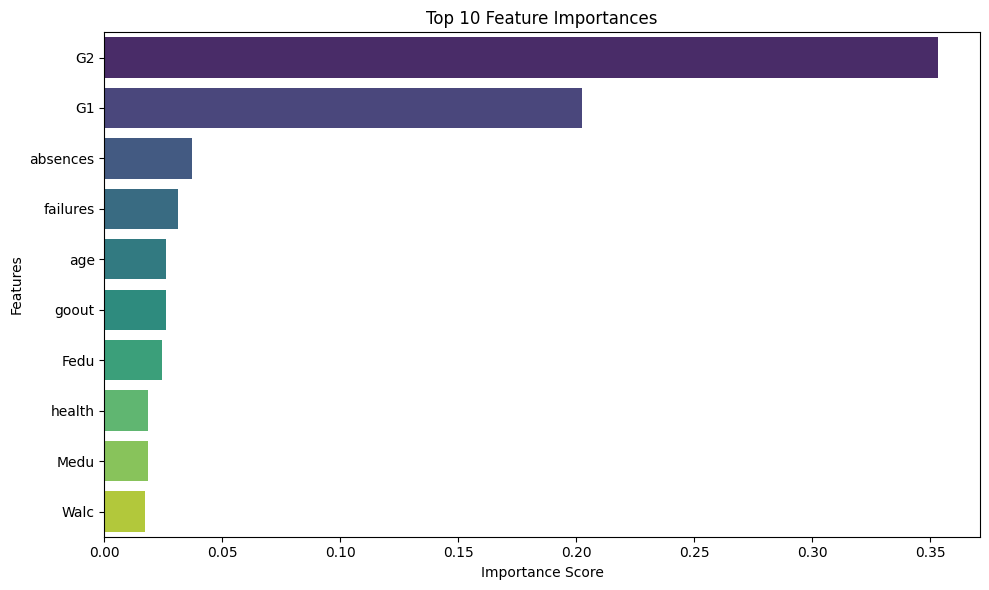

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the trained model
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.nlargest(10), y=feat_importances.nlargest(10).index, palette="viridis")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Try Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Logistic Regression Accuracy:", lr.score(X_test, y_test))

# Try Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
print("SVM Accuracy:", svm.score(X_test, y_test))

Logistic Regression Accuracy: 0.9240506329113924
SVM Accuracy: 0.8860759493670886
